In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime,timedelta

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('D:\\Data Sience project datasets\\Temperature Forcasting/GlobalLandTemperaturesByState.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [10]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [11]:
df.shape

(645675, 5)

In [14]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [15]:
df=df.dropna(how='any',axis=0)

In [17]:
df.shape

(620027, 5)

In [18]:
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
dtype: int64

In [21]:
df.rename(columns={'dt':'Date','AverageTemperature':'Avg_temp','AverageTemperatureUncertainty':'Confidence_interval_temp'},
          inplace=True)
df.head()

,Date,Avg_temp,Confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [22]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_temp,620027.0,8.993111,13.772150,-45.389,-0.693,11.199,19.899,36.339
Confidence_interval_temp,620027.0,1.287647,1.360392,0.036,0.316,0.656,1.850,12.646


In [26]:
df['Year']=df.index.year
df.head()

,Avg_temp,Confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [27]:
df.describe()

,Avg_temp,Confidence_interval_temp,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [29]:
latest_df=df.loc['1980':'2013']
latest_df.head()

,Avg_temp,Confidence_interval_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [30]:
latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


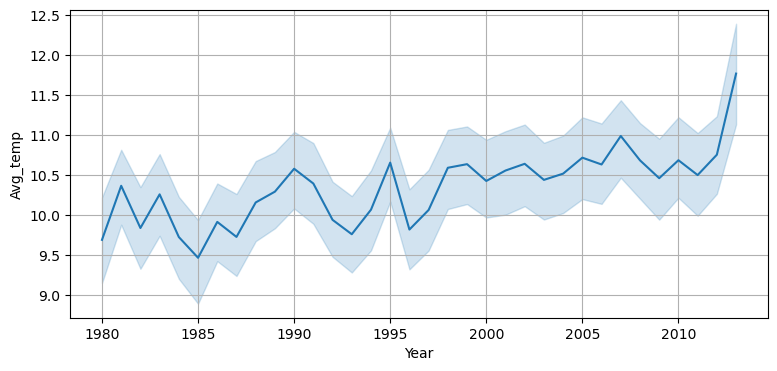

In [33]:
plt.figure(figsize=(9,4))
sns.lineplot(x='Year',y='Avg_temp',data=latest_df)
plt.grid()
plt.show()

In [34]:
resample_df=latest_df[['Avg_temp']].resample('A').mean()
resample_df.head()

,Avg_temp
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


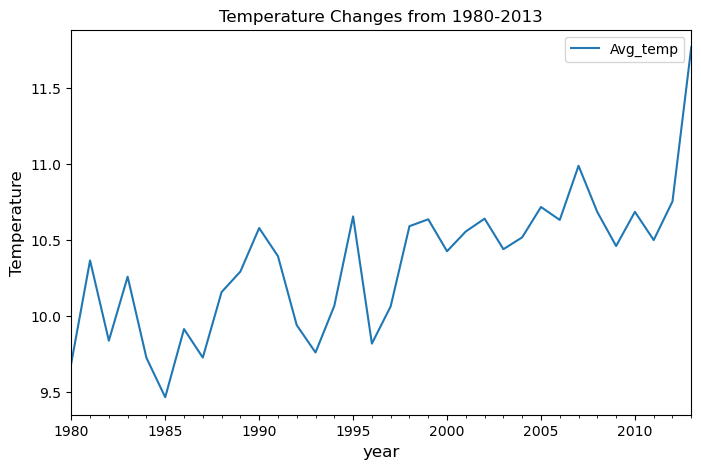

In [35]:
resample_df.plot(title="Temperature Changes from 1980-2013",figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('year',fontsize=12)
plt.legend()
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller

print('Dickey-Fuller Test Results:')
test_df=adfuller(resample_df.iloc[:,0].values, autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','P-value','Lags Used','Number of observation used'])
for key,value in test_df[4].items():
    df_output[f'Critical Value ({key})']=value
print(df_output)

Dickey-Fuller Test Results:
Test Statistic                -0.728209
P-value                        0.839307
Lags Used                      2.000000
Number of observation used    31.000000
Critical Value (1%)           -3.661429
Critical Value (5%)           -2.960525
Critical Value (10%)          -2.619319
dtype: float64


In [45]:
decomp=seasonal_decompose(resample_df,period=3)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

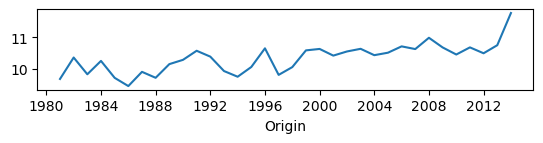

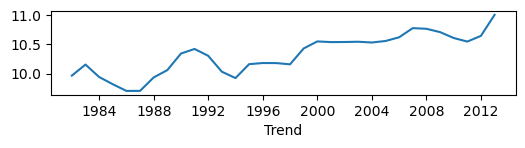

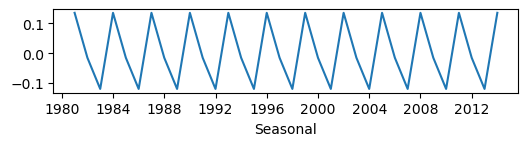

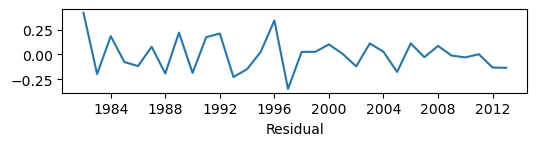

<Figure size 600x500 with 0 Axes>

In [47]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Origin')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.show()


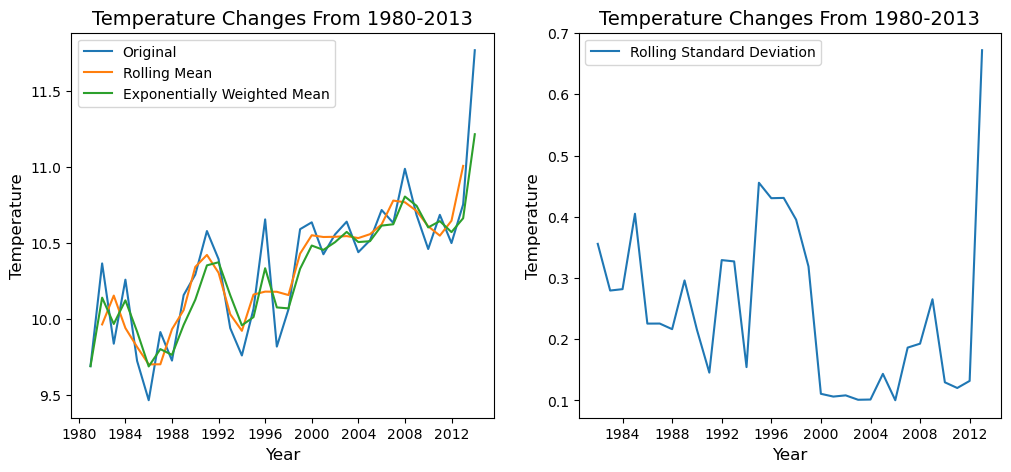

In [51]:
#Rolling Mean
rol_mean=resample_df.rolling(window=3, center=True).mean()
#Exponential Weighted Mean(ewm)
ewm=resample_df.ewm(span=3).mean()
#Rolling Standard Deviation
rol_std=resample_df.rolling(window=3,center=True).std()

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label="Rolling Mean")
ax1.plot(ewm,label="Exponentially Weighted Mean")
ax1.set_title('Temperature Changes From 1980-2013',fontsize=14)
ax1.set_xlabel('Year',fontsize=12)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label='Rolling Standard Deviation')
ax2.set_title('Temperature Changes From 1980-2013',fontsize=14)
ax2.set_xlabel('Year',fontsize=12)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.legend()

plt.tight_layout
plt.show()

In [55]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

print('Dickey-Fuller Test for the Rolling Mean:')
df_test=adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistic','P-value','Lags Used','Number of observation used'])
for key,value in df_test[4].items():
    df_output[f'Critical Value ({key})']=value
print(df_output)
print('')
print('Dickey-Fuller Test for Exponantially Weighted Mean:')
df_test=adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistic','P-value','Lags Used','Number of observation used'])
for key,value in df_test[4].items():
    df_output[f'Critical Value ({key})']=value
print(df_output)


Dickey-Fuller Test for the Rolling Mean:
Test Statistic                 0.275101
P-value                        0.976173
Lags Used                      8.000000
Number of observation used    23.000000
Critical Value (1%)           -3.752928
Critical Value (5%)           -2.998500
Critical Value (10%)          -2.638967
dtype: float64

Dickey-Fuller Test for Exponantially Weighted Mean:
Test Statistic                -0.338693
P-value                        0.919843
Lags Used                      2.000000
Number of observation used    31.000000
Critical Value (1%)           -3.661429
Critical Value (5%)           -2.960525
Critical Value (10%)          -2.619319
dtype: float64


In [56]:
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_temp
Date,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [58]:
diff_rol_ewm = resample_df - ewm
diff_rol_ewm.dropna(inplace=True)
diff_rol_ewm.head()

,Avg_temp
Date,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


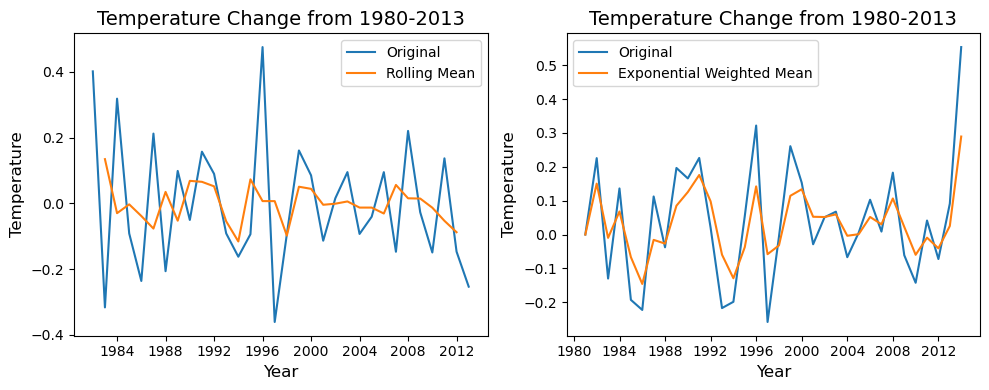

In [62]:
df_rol_mean_diff=diff_rol_mean.rolling(window=3, center=True).mean()

df_ewm_mean_diff=diff_rol_ewm.ewm(span=3).mean()

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

ax1.plot(diff_rol_mean, label='Original')
ax1.plot(df_rol_mean_diff, label='Rolling Mean')
ax1.set_title('Temperature Change from 1980-2013',fontsize=14)
ax1.set_xlabel('Year',fontsize=12)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.legend()

ax2.plot(diff_rol_ewm, label='Original')
ax2.plot(df_ewm_mean_diff, label=('Exponential Weighted Mean'))
ax2.set_title('Temperature Change from 1980-2013',fontsize=14)
ax2.set_xlabel('Year',fontsize=12)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [63]:
print('Dickey-Fuller Test for the Difference between the original and rolling Mean:')
dftest=adfuller(diff_rol_mean.iloc[:,0],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','P-value','Lags Used','Number of observation used'])
for key,value in dftest[4].items():
    dfoutput[f'Critical Value ({key})']=value
print(dfoutput)
print('')
print('Dickey-Fuller Test for the Difference between the original and Exponential Weighted Mean:')
dftest=adfuller(diff_rol_ewm.iloc[:,0],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','P-value','Lags Used','Number of observation used'])
for key,value in dftest[4].items():
    dfoutput[f'Critical Value ({key})']=value
print(dfoutput)

Dickey-Fuller Test for the Difference between the original and rolling Mean:
Test Statistic               -7.007710e+00
P-value                       7.051586e-10
Lags Used                     1.000000e+00
Number of observation used    3.000000e+01
Critical Value (1%)          -3.669920e+00
Critical Value (5%)          -2.964071e+00
Critical Value (10%)         -2.621171e+00
dtype: float64

Dickey-Fuller Test for the Difference between the original and Exponential Weighted Mean:
Test Statistic                -4.297446
P-value                        0.000449
Lags Used                      1.000000
Number of observation used    32.000000
Critical Value (1%)           -3.653520
Critical Value (5%)           -2.957219
Critical Value (10%)          -2.617588
dtype: float64


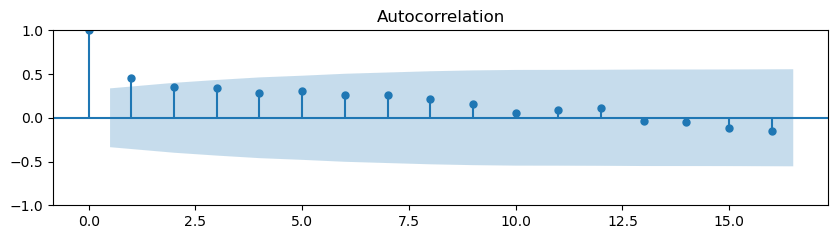

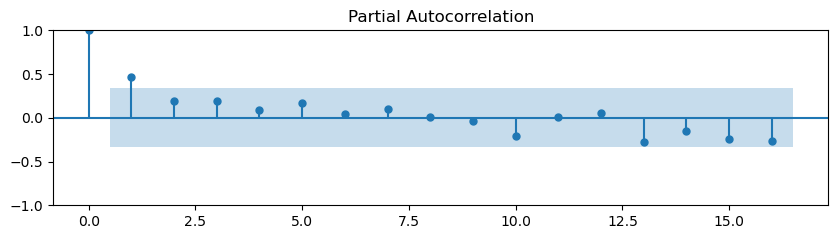

In [65]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df,ax=pyplot.gca())

pyplot.figure(figsize=(10,5))
pyplot.subplot(212)
plot_pacf(resample_df,ax=pyplot.gca())
plt.show()